In [204]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df01= pd.read_csv("MasterCapStoneFile_01.csv" )



  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

Histrograms =  show the frequency of distribution. 

## ML 

##### Dividing the dataset into independent and dependent features.

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
from sklearn import linear_model

In [206]:
df_01 = df01.drop(columns=[ 'HD_M_US', 'HD_M_REL_US',  'HBP_M_US','HBP_M_REL_US',  'HC_M_US', 'HC_M_REL_US', 
'OB_M_US', 'OB_M_REL_US',  'DB_M_US', 'DB_M_REL_US'])

In [207]:
df_01

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
1,4.7,28.3,21.8,30.6,10.8,9.2
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
4,4.0,33.0,35.0,25.7,8.1,7.0
...,...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9,1.3
27206,4.9,32.5,30.7,33.0,7.4,3.1
27207,6.7,31.3,28.0,33.9,10.3,4.5
27208,5.2,31.9,34.1,29.7,16.4,4.9


#### Below is the dataframe for the ML models:

In [208]:
# Removing outliers by query for the values to keep

df = df_01.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & \
                  `DB_M_Value` >0 & `DB_M_Value` <19  & \
                  `HD_M_Value` <9  & `HD_M_Value` >1  & \
                  `HBP_M_Value` >13 & `HBP_M_Value` <45 & \
                  `HC_M_Value` >22 & `HC_M_Value` <42  & \
                  `Target_Value` >1 & `Target_Value` < 5" )
print(df)

       HD_M_Value  HBP_M_Value  HC_M_Value  OB_M_Value  DB_M_Value  \
0             4.2         32.3        34.1        30.3        12.2   
2             5.8         33.8        36.7        17.3         9.9   
3             4.4         27.4        27.1        22.1        14.7   
5             3.5         24.4        27.5        25.3        11.4   
6             5.5         28.1        33.7        22.5         3.4   
...           ...          ...         ...         ...         ...   
27205         3.3         20.8        27.6        33.8        11.9   
27206         4.9         32.5        30.7        33.0         7.4   
27207         6.7         31.3        28.0        33.9        10.3   
27208         5.2         31.9        34.1        29.7        16.4   
27209         4.8         30.6        28.1        27.0        12.2   

       Target_Value  
0               3.4  
2               3.1  
3               2.0  
5               2.6  
6               2.9  
...             ...  
27205

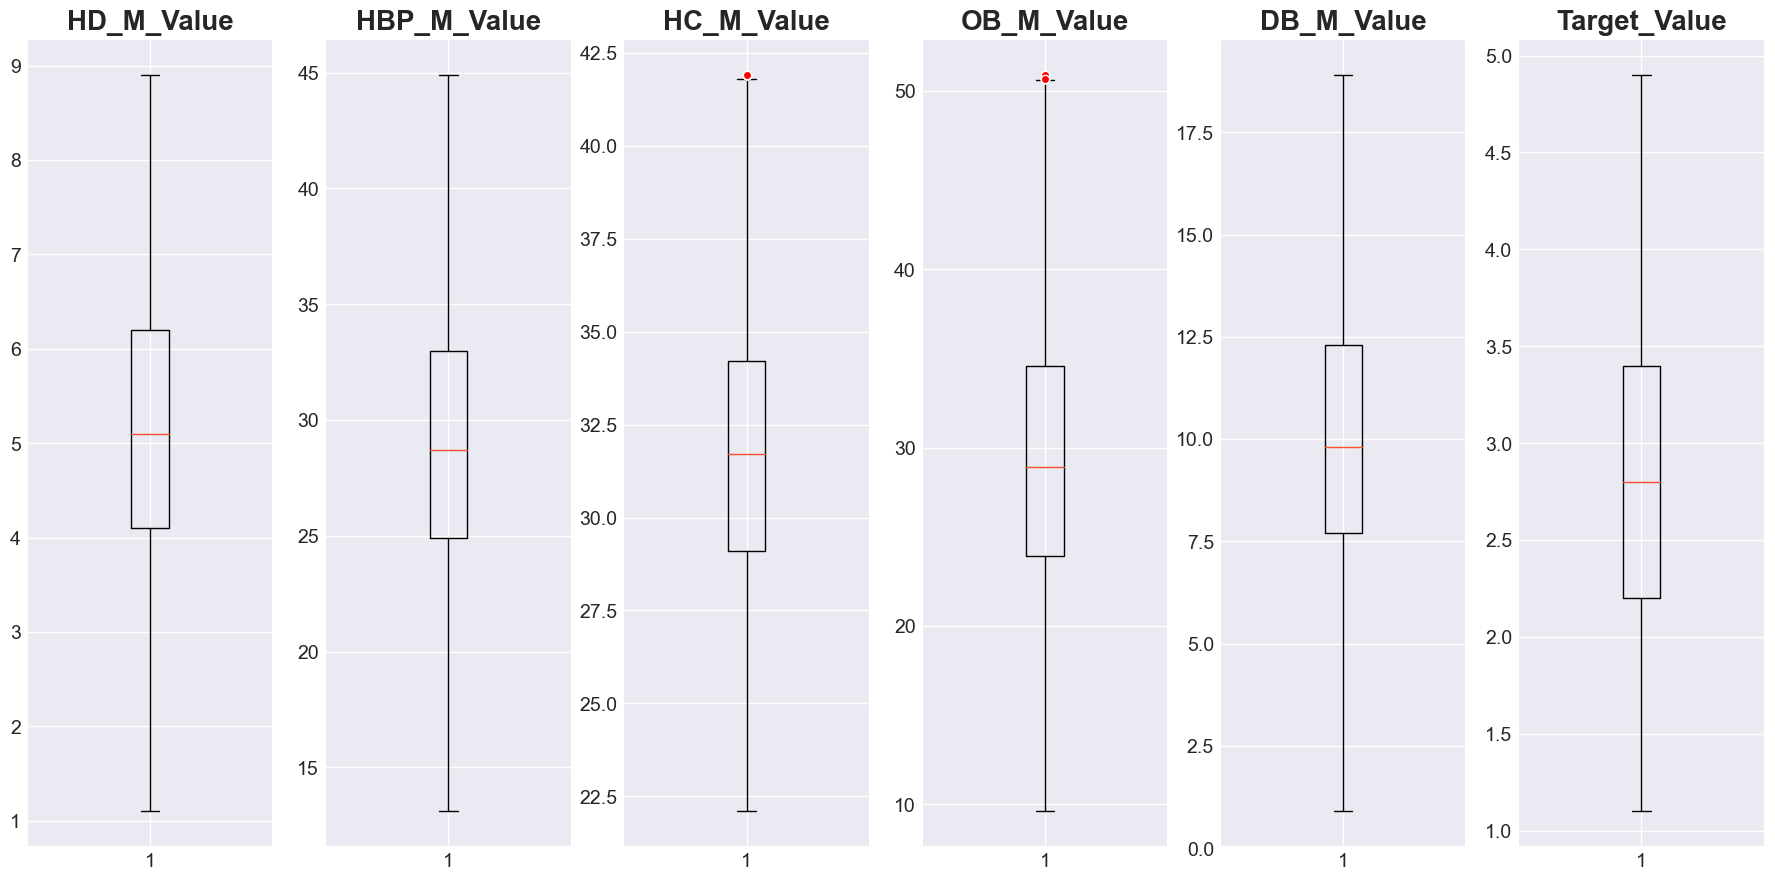

In [209]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

ML Analysis - LinearRegression Model

In [210]:
# laod types of model to use.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [211]:
X=df.iloc[:, 1:] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

X
#y

,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,32.3,34.1,30.3,12.2,3.4
2,33.8,36.7,17.3,9.9,3.1
3,27.4,27.1,22.1,14.7,2.0
5,24.4,27.5,25.3,11.4,2.6
6,28.1,33.7,22.5,3.4,2.9
...,...,...,...,...,...
27205,20.8,27.6,33.8,11.9,1.3
27206,32.5,30.7,33.0,7.4,3.1
27207,31.3,28.0,33.9,10.3,4.5
27208,31.9,34.1,29.7,16.4,4.9


In [212]:

# Setting up the plit for all models below:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train)
len(X_test)

X_train.shape
#X_test
#y_train



(14710, 5)

ML Analyzing using - Linear Regression Model.

In [213]:
# Fit/load into a model

modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [214]:
df.head()

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9


In [215]:
X_predict_test = modelReg.predict([ [ 5.8,	33.8,	36.7,	17.3,	9.9	 ] ])
X_predict_test

c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.9])

In [216]:
y_pred = modelReg.predict(X_test) # predict X(all factors).
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)

1.0

In [217]:
# plot to compare the differenct in these two values.
# Actual Values
print(y_test)

#Predicted X Values to test against Y(Target_Value).
print(y_pred)

4510     2.1
4568     2.4
405      2.3
7528     2.2
19329    3.1
        ... 
18047    3.6
16162    1.6
4763     1.2
5000     2.8
13303    1.2
Name: Target_Value, Length: 3678, dtype: float64
[2.1 2.4 2.3 ... 1.2 2.8 1.2]


Predicted Values save to df - Linear Regression 

In [218]:
# Creating new df for the results
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:20]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
4510,2.1,2.1,4.440892e-16,1.972152e-31,2.114711e-14
4568,2.4,2.4,0.000000e+00,0.000000e+00,0.000000e+00
405,2.3,2.3,8.881784e-16,7.888609e-31,3.861645e-14
7528,2.2,2.2,1.332268e-15,1.774937e-30,6.055762e-14
19329,3.1,3.1,0.000000e+00,0.000000e+00,0.000000e+00
19696,3.5,3.5,4.440892e-16,1.972152e-31,1.268826e-14
6937,2.3,2.3,4.440892e-16,1.972152e-31,1.930823e-14
9231,4.4,4.4,0.000000e+00,0.000000e+00,0.000000e+00
24076,2.2,2.2,4.440892e-16,1.972152e-31,2.018587e-14
4095,2.3,2.3,8.881784e-16,7.888609e-31,3.861645e-14


In [219]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

1.0
Score 1.0
r2:1.0  
mae:5.29997168743026e-16  
MAE =  5.29997168743026e-16
MAD =  5.29997168743026e-16
MSE =  5.147140459789829e-31
MAPE =  2.220951907788073e-14


In [220]:
#model_ranks=pd.Series(modelReg.feature_importances_,index=X_train.columns,name='Importance')
#ax=model_ranks.plot(kind='barh')

In [221]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


XGBRegessor ML Model

In [222]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)
y_pred = modelXGB.predict(X_test) # Predicting X(all factors).
modelXGB.score(X_test,y_test) # The performance.


0.9999999993934354

In [223]:

#-=================
# Creating new df - holding values for Decision Tree

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:20]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
4510,2.1,2.099994,6.294250e-06,3.961759e-11,0.000300
4568,2.4,2.400007,7.009506e-06,4.913318e-11,0.000292
405,2.3,2.300004,4.482269e-06,2.009074e-11,0.000195
7528,2.2,2.200004,4.339218e-06,1.882881e-11,0.000197
19329,3.1,3.099997,2.717972e-06,7.387371e-12,0.000088
19696,3.5,3.499996,3.814697e-06,1.455192e-11,0.000109
6937,2.3,2.300004,4.482269e-06,2.009074e-11,0.000195
9231,4.4,4.400012,1.249313e-05,1.560784e-10,0.000284
24076,2.2,2.200004,4.339218e-06,1.882881e-11,0.000197
4095,2.3,2.300004,4.482269e-06,2.009074e-11,0.000195


In [224]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

Score 0.9999999993934354
r2:0.9999999993934231  
mae:1.0544233441383509e-05  
mean_absolute_error =  1.0544233441383509e-05
mean_absolute_percentage_error =  3.7933937379733277e-06
MAD =  1.0544233441383509e-05
MSE =  4.330173906014301e-10
MAPE =  0.00037934212032671535
MSE =  4.330173906014301e-10
SSE =  1.59263796263206e-06


ML Analyzing using - Decision Tree Model.

In [225]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.


1.0

In [226]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:20]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
4510,2.1,2.1,1.065814e-14,1.135960e-28,5.075305e-13
4568,2.4,2.4,2.220446e-14,4.930381e-28,9.251859e-13
405,2.3,2.3,2.664535e-14,7.099748e-28,1.158494e-12
7528,2.2,2.2,2.398082e-14,5.750796e-28,1.090037e-12
19329,3.1,3.1,1.554312e-14,2.415887e-28,5.013910e-13
19696,3.5,3.5,0.000000e+00,0.000000e+00,0.000000e+00
6937,2.3,2.3,2.664535e-14,7.099748e-28,1.158494e-12
9231,4.4,4.4,0.000000e+00,0.000000e+00,0.000000e+00
24076,2.2,2.2,2.398082e-14,5.750796e-28,1.090037e-12
4095,2.3,2.3,2.664535e-14,7.099748e-28,1.158494e-12


In [227]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 1.0
r2:1.0  
mae:1.501855856764681e-14  
mean_absolute_error =  1.501855856764681e-14
mean_absolute_percentage_error =  5.569343117086036e-15
MAD =  1.501855856764681e-14
MSE =  3.65635407557814e-28
MAPE =  5.569343117086035e-13


In [228]:
from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_DT_df['Actual Stroke Value'], pred_y_DT_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_DT_df['Sqr'].sum())

MSE =  3.65635407557814e-28
SSE =  1.3448070289976398e-24


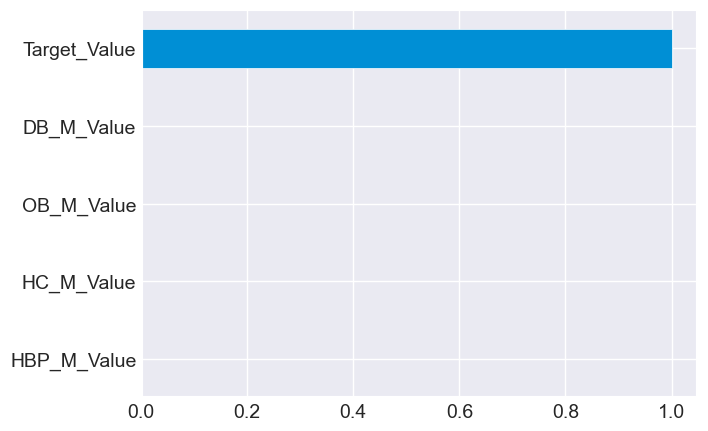

In [229]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

#### ML Analyzing using - RandomForestRegressor Model.

In [230]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
modelRF.score(X_test,y_test)



1.0

In [231]:

pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:20]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
3595,3.3,3.3,1.243450e-14,1.546167e-28,3.768030e-13
17812,2.4,2.4,4.440892e-15,1.972152e-29,1.850372e-13
26913,4.5,4.5,0.000000e+00,0.000000e+00,0.000000e+00
17481,2.8,2.8,1.509903e-14,2.279808e-28,5.392512e-13
2837,3.7,3.7,8.437695e-15,7.119470e-29,2.280458e-13
17113,3.1,3.1,4.440892e-16,1.972152e-31,1.432546e-14
2632,1.9,1.9,6.217249e-15,3.865418e-29,3.272236e-13
4274,2.9,2.9,5.329071e-15,2.839899e-29,1.837611e-13
21219,3.3,3.3,1.243450e-14,1.546167e-28,3.768030e-13
1915,1.9,1.9,6.217249e-15,3.865418e-29,3.272236e-13


In [232]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 1.0
r2:1.0  
mae:4.80022039880345e-15  
mean_absolute_error =  4.80022039880345e-15
mean_absolute_percentage_error =  1.762342007924247e-15
MSE 4.648877102073612e-29
MAD =  4.80022039880345e-15
MSE =  4.648877102073612e-29
MAPE =  1.7623420079242474e-13


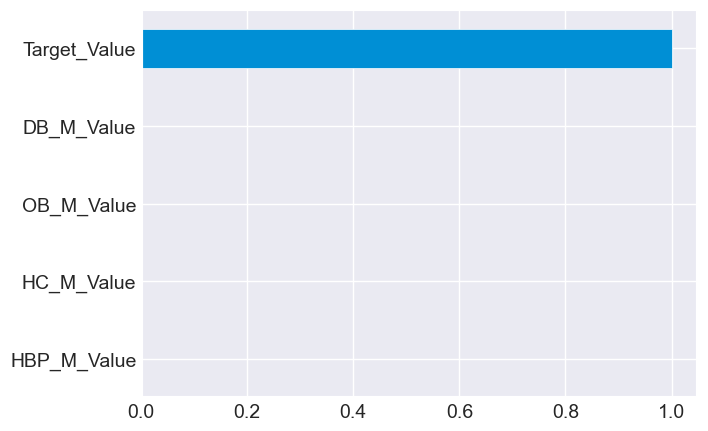

In [233]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')